# 8-2 합성곱 신경망을 사용한 이미지 분류

### 8-2-1 패션 MNIST 데이터 불러오기

In [21]:
from tensorflow import keras

(train,target1),(test,target2)=keras.datasets.fashion_mnist.load_data()

In [22]:
train.shape

(60000, 28, 28)

In [23]:
test.shape

(10000, 28, 28)

2차원 흑백 이미지 배열을 3차원 배열로 바꾸고 값을 0과 1 사이가 되도록 만들자.

In [24]:
strain=train.reshape(-1,28,28,1)/255.0

In [25]:
strain.shape

(60000, 28, 28, 1)

`strain, target1` 데이터를 strain, val 두 가지 데이터로 나누자.

In [26]:
from sklearn.model_selection import train_test_split

strain,val,target1,target3=train_test_split(strain,target1,stratify=target1,random_state=0)

In [27]:
strain.shape

(45000, 28, 28, 1)

In [28]:
val.shape

(15000, 28, 28, 1)

### 8-2-2 합성곱 신경망 만들기

1) `Sequential()` 객체 만들기

In [29]:
m=keras.Sequential()

2) 첫번째 합성곱 층 `Conv2D` 추가(필터 수 32개, same padding, ReLu 활성화함수 사용), `MaxPooling2D()`를 이용해서 최대풀링층 추가

In [30]:
m.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7장과 다른 점은 `input_shape`의 모양이다. `Conv2D()`에서는 `input_shape`이 3차원이어야한다.

In [31]:
m.add(keras.layers.MaxPooling2D(2))

원래 입력은 (28, 28, 1)이었지만 이 단계에서 특성맵의 크기는 (14, 14, 32)가 된다.

3) 두번째 합성곱 층 추가(필터 수 64개), 풀링층 추가

In [32]:
m.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu',padding='same'))
m.add(keras.layers.MaxPooling2D(2))

이 단계에서 특성맵의 크기는 (7, 7, 64).

4) 3차원 특성맵을 1차원으로 바꾸고 밀집 은닉층 추가, 드롭아웃 층 추가, 출력층 추가

In [33]:
m.add(keras.layers.Flatten())
m.add(keras.layers.Dense(100,activation='relu'))
m.add(keras.layers.Dropout(0.3))
m.add(keras.layers.Dense(10,activation='softmax'))

5) 모델의 구조 확인

In [34]:
m.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │         313,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

위의 결과에서 매개변수 수를 확인해보자.

### 8-2-3 모델 컴파일과 훈련

7.3절과 마찬가지로 `adam` 옵티마이저와 callbacks 가운데 ModelCheckpoint, EarlyStopping을 이용해서 최적 모델을 저장하고 조기종료하자.

In [35]:
m.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

cb1 = keras.callbacks.ModelCheckpoint('bm.keras',save_best_only=True)
cb2 = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)

history = m.fit(strain, target1, epochs=20,
                validation_data=(val, target3),
                callbacks=[cb1, cb2])

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 73s 50ms/step - accuracy: 0.7442 - loss: 0.7033 - val_accuracy: 0.8731 - val_loss: 0.3346
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 76s 46ms/step - accuracy: 0.8725 - loss: 0.3549 - val_accuracy: 0.8983 - val_loss: 0.2779
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 47ms/step - accuracy: 0.8930 - loss: 0.2960 - val_accuracy: 0.9097 - val_loss: 0.2495
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 79s 45ms/step - accuracy: 0.9038 - loss: 0.2613 - val_accuracy: 0.9123 - val_loss: 0.2340
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 43ms/step - accuracy: 0.9150 - loss: 0.2298 - val_accuracy: 0.9089 - val_loss: 0.2491
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 67s 48ms/step - accuracy: 0.9234 - loss: 0.2106 - val_accuracy: 0.9182 - val_loss: 0.2262
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 77s 44ms/step - accuracy: 0.9307 - loss: 0.1872 - val_accuracy: 0.9184 - val_loss: 0.2229
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 62s 44ms/step - accuracy: 0.9349 -

실행시간이 꽤 걸린다.

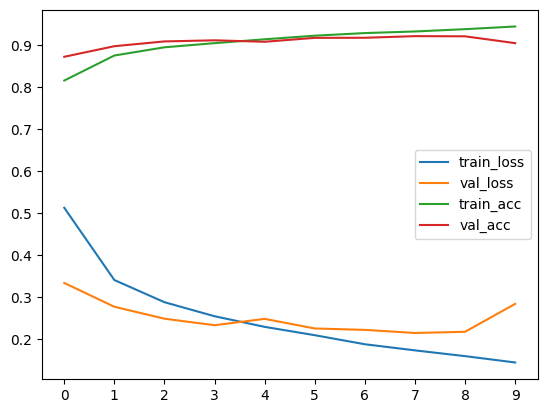

In [39]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xticks(range(0, 10, 1))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xticks(range(0, 10, 1))
plt.legend(['train_loss', 'val_loss','train_acc','val_acc'])

저장된 최적 모델로 validation data에서의 성능을 평가해보자.

In [40]:
m.evaluate(val, target3)

469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9252 - loss: 0.2060


[0.21546702086925507, 0.9222666621208191]

첫번째 validation data의 target값을 그려보고 예측해보자. matplotlib의 imshow를 이용하려면 3차원을 다시 2차원 배열로 바꾸어야한다.

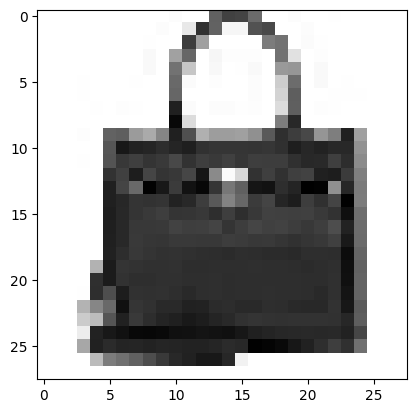

In [41]:
import matplotlib.pyplot as plt

plt.imshow(val[0].reshape(28, 28), cmap='gray_r')

In [42]:
pred = m.predict(val[0:1])
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
[[7.1026129e-11 7.8888210e-19 7.9900148e-17 6.9223334e-16 7.8828545e-14
  1.5612608e-11 1.1712003e-12 2.0257940e-14 1.0000000e+00 1.7880827e-12]]


Text(0, 0.5, 'prob.')

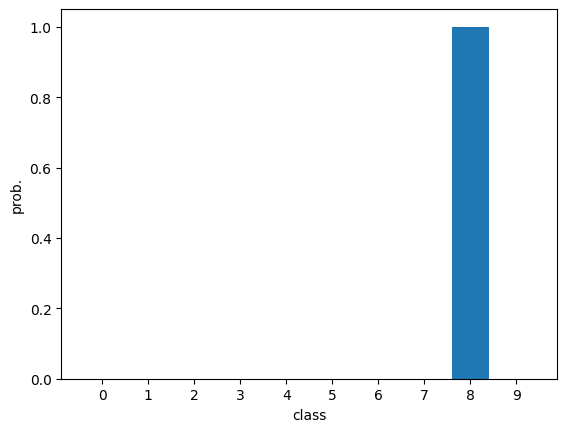

In [49]:
import matplotlib.pyplot as plt

plt.bar(range(0, 10), pred[0])
plt.xticks(range(0, 10, 1))
plt.xlabel('class')
plt.ylabel('prob.')

In [50]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [51]:
import numpy as np

print(classes[np.argmax(pred)])

가방


마지막으로 test data에서 합성곱 신경망 모델의 성능을 측정해보자.

In [53]:
test.shape

(10000, 28, 28)

In [54]:
stest = test.reshape(-1, 28, 28, 1) / 255.0

In [55]:
m.evaluate(stest, target2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9201 - loss: 0.2482


[0.2419947236776352, 0.917900025844574]